In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

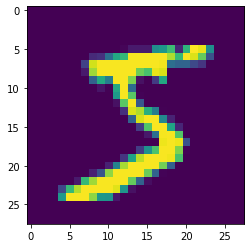

In [4]:
plt.imshow(x_train[0])

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train.max()

255

In [7]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [40]:
x_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Using a model with only one layer (output layer) and original data

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation= 'sigmoid')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 621us/step - loss: 17.7832 - accuracy: 0.7750
Epoch 2/5
1875/1875 [==============================] - 1s 563us/step - loss: 6.2743 - accuracy: 0.8803
Epoch 3/5
1875/1875 [==============================] - 1s 568us/step - loss: 5.5049 - accuracy: 0.8854
Epoch 4/5
1875/1875 [==============================] - 1s 561us/step - loss: 5.3537 - accuracy: 0.8886
Epoch 5/5
1875/1875 [==============================] - 1s 574us/step - loss: 5.1796 - accuracy: 0.8894


In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 503us/step - loss: 5.7654 - accuracy: 0.8899


[5.7654266357421875, 0.8899000287055969]

In [37]:
pred = np.array([np.argmax(i) for i in model.predict(x_test[:10])])
print(pred) 
print(y_test[:10])

[3 0 1 0 2 1 4 1 2 4]
[7 2 1 0 4 1 4 9 5 9]


somewhat accurate, but not satisfying

## Now we will add a hidden layer to the model

In [17]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [18]:
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [19]:
model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 876us/step - loss: 7.8891 - accuracy: 0.8158
Epoch 2/5
1875/1875 [==============================] - 2s 844us/step - loss: 0.4021 - accuracy: 0.9066
Epoch 3/5
1875/1875 [==============================] - 2s 847us/step - loss: 0.2837 - accuracy: 0.9271
Epoch 4/5
1875/1875 [==============================] - 2s 839us/step - loss: 0.2414 - accuracy: 0.9359
Epoch 5/5
1875/1875 [==============================] - 2s 830us/step - loss: 0.2244 - accuracy: 0.9413


In [20]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 0s 569us/step - loss: 0.2462 - accuracy: 0.9383


[0.24623650312423706, 0.9383000135421753]

In [38]:
pred = np.array([np.argmax(i) for i in model2.predict(x_test[:10])])
print(pred) 
print(y_test[:10])

[1 2 0 0 4 0 4 9 0 3]
[7 2 1 0 4 1 4 9 5 9]


## Using scaled data this time

In [21]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [22]:
model3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [23]:
model3.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 810us/step - loss: 0.4471 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 2s 815us/step - loss: 0.1261 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 2s 827us/step - loss: 0.0842 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 2s 930us/step - loss: 0.0600 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 2s 847us/step - loss: 0.0456 - accuracy: 0.9862


In [24]:
model3.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 604us/step - loss: 0.0772 - accuracy: 0.9766


[0.07716242969036102, 0.9765999913215637]

In [39]:
pred = np.array([np.argmax(i) for i in model3.predict(x_test_scaled[:10])])
print(pred) 
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


#### much more accurate
#### We will use this model for further analysis and improve it 

### We will use a correlation matrix to get the info about true and false values in model

In [25]:
y_predicted_labels = [np.argmax(i) for i in model3.predict(x_test_scaled)]

Text(69.0, 0.5, 'true')

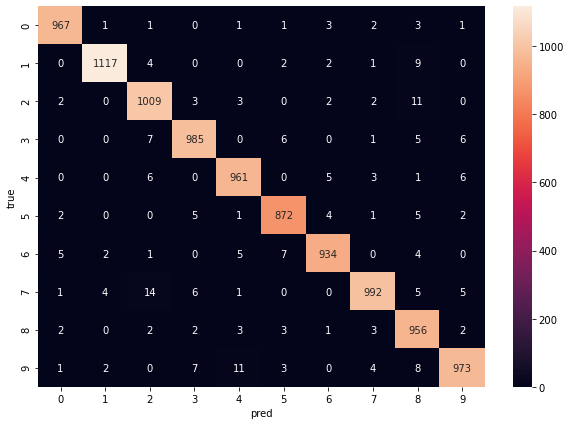

In [26]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("pred")
plt.ylabel('true')

## Let's use another hidden layer

In [46]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [47]:
model4.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [48]:
model4.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3251 - accuracy: 0.9012
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0810 - accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0546 - accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0379 - accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9907


In [49]:
model4.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 910us/step - loss: 0.0805 - accuracy: 0.9784


[0.08045951277017593, 0.9783999919891357]

#### we see a slight improvement in accuracy

#### We notice that model performs better on training than on test. This might be because of over fitting

## Let's use a Dropout layer

In [50]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [51]:
model5.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [52]:
model5.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3768 - accuracy: 0.8849
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1116 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0786 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0594 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9820


In [53]:
model4.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 899us/step - loss: 0.0805 - accuracy: 0.9784


[0.08045951277017593, 0.9783999919891357]

### We noticed no promising change in the accuracies 